# Greatest Features of Python
or: how to manage expectations
or: a veritable smorgasbord, an assortment of anthologies, a medley of miscellaneous things that I do with Python

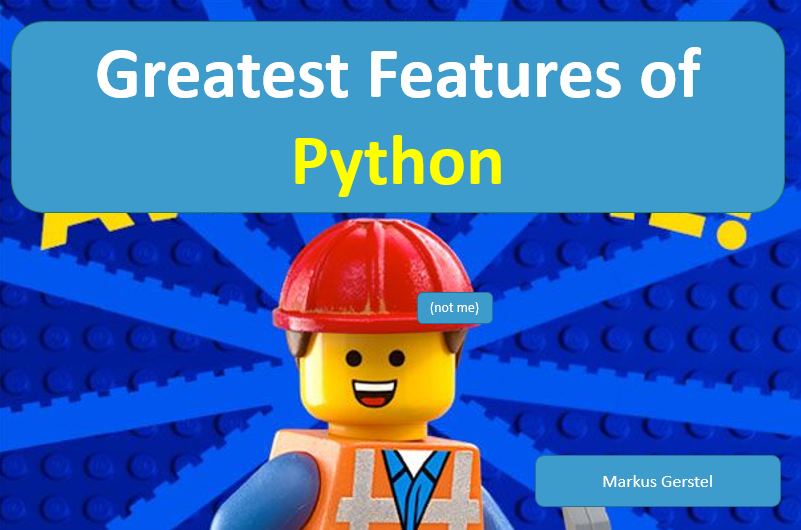

Unless otherwise mentioned I'll be assuming Python 3.6+.

# Dictionaries

## Regular Python dictionaries

In [1]:
d = {"a": 1, "b": 2, "c": 3}
print(d)

{'a': 1, 'b': 2, 'c': 3}


In [2]:
d = dict(a=1, b=2, c=3)
d

{'a': 1, 'b': 2, 'c': 3}

In [3]:
d["d"] += 1

KeyError: 'd'

In [5]:
if "d" in d: 
    d["d"] += 1
else:
    d["d"] = 1
d

{'a': 1, 'b': 2, 'c': 3, 'd': 2}

In [6]:
d["e"] = d.get("e", 0) + 1
d

{'a': 1, 'b': 2, 'c': 3, 'd': 2, 'e': 1}

In [7]:
d.setdefault("e", 0)
d["e"] += 1
d

{'a': 1, 'b': 2, 'c': 3, 'd': 2, 'e': 2}

From Python 3.7 onwards (CPython 3.6+) all dictionaries are ordered.

## All values are the same

In [8]:
dict.fromkeys(["a", "b", "c"], 0)

{'a': 0, 'b': 0, 'c': 0}

You don't always need lists when all you want is something that iterates once. 
Tuples are faster than lists.

In [9]:
dict.fromkeys(("a", "b", "c"), "tuple")

{'a': 'tuple', 'b': 'tuple', 'c': 'tuple'}

In [10]:
dict.fromkeys(range(5), "or range")

{0: 'or range', 1: 'or range', 2: 'or range', 3: 'or range', 4: 'or range'}

In [11]:
dict.fromkeys("abc", "or a string")

{'a': 'or a string', 'b': 'or a string', 'c': 'or a string'}

### Slightly more advanced dictionaries
`collections.defaultdict` takes a function that is called without parameters when a new element is needed.

In [12]:
import collections
dd = collections.defaultdict(lambda: 0)
dd

defaultdict(<function __main__.<lambda>()>, {})

In [13]:
dd["a"]

0

In [14]:
dd["b"] += 1
dd

defaultdict(<function __main__.<lambda>()>, {'a': 0, 'b': 1})

In [16]:
dictionary_of_lists = collections.defaultdict(list)
dictionary_of_lists["tricks"].extend("""
    You can pass eg.
          list, int, dict, set,   etc.
    to get [],   0,   {} , set(), ...
    """.strip().split("\n"))
dictionary_of_lists

defaultdict(list,
            {'tricks': ['You can pass eg.',
              '          list, int, dict, set,   etc.',
              '    to get [],   0,   {} , set(), ...']})

## References
* https://docs.python.org/3/tutorial/datastructures.html#dictionaries
* https://docs.python.org/3/library/collections.html#collections.defaultdict

# Enums

In [18]:
from enum import Enum
class DataCollection(Enum):
    GRIDSCAN = 1
    ROTATION = 2
    HELICAL = 3
DataCollection.GRIDSCAN

<DataCollection.GRIDSCAN: 1>

In [19]:
DataCollection.GRIDSCAN is DataCollection.GRIDSCAN

True

In [20]:
DataCollection.GRIDSCAN is DataCollection.HELICAL

False

In [21]:
DataCollection.GRIDSCAN + 1

TypeError: unsupported operand type(s) for +: 'DataCollection' and 'int'

In [22]:
isinstance(DataCollection.GRIDSCAN, DataCollection)

True

In [24]:
good_for_data = {
    DataCollection.GRIDSCAN: False,
    DataCollection.ROTATION: True,
    DataCollection.HELICAL: ...
}
good_for_data

{<DataCollection.GRIDSCAN: 1>: False,
 <DataCollection.ROTATION: 2>: True,
 <DataCollection.HELICAL: 3>: Ellipsis}

## References
* https://docs.python.org/3/library/enum.html

# Keeping data together

In [25]:
a_dictionary = {"key1": "value", "key2": "value"}
a_set = {"value1", "value2"}
a_list = [3, "ordered", "things"]
a_tuple = ({"cardinality": 4}, "ordered", "immutable", "things")

In [27]:
a_tuple[0]["caveat"] = "The tuple is immutable. The things it references - not so much"
a_tuple

({'cardinality': 4,
  'caveat': 'The tuple is immutable. The things it references - not so much'},
 'ordered',
 'immutable',
 'things')

## Named tuples

In [29]:
import collections
UAS = collections.namedtuple("UAS", "session PI")
visit = UAS("cm12345-12", "jane doe")

In [30]:
visit.session, visit.PI

('cm12345-12', 'jane doe')

In [31]:
visit.PI = "evil hacker"

AttributeError: can't set attribute

In [32]:
print(visit._fields)
print(visit._asdict())

('session', 'PI')
{'session': 'cm12345-12', 'PI': 'jane doe'}


In [34]:
visit._replace(PI="me")

UAS(session='cm12345-12', PI='me')

In [35]:
visit

UAS(session='cm12345-12', PI='jane doe')

In [37]:
import math
visit._replace(PI=math.pi)

UAS(session='cm12345-12', PI=3.141592653589793)

## Typed named tuple

In [38]:
import typing
class UAS_idiotproof(typing.NamedTuple):
    session: str
    PI: str
        
visit = UAS_idiotproof("cm12345-12", "me")
visit

UAS_idiotproof(session='cm12345-12', PI='me')

In [39]:
visit._replace(PI=math.pi)

UAS_idiotproof(session='cm12345-12', PI=3.141592653589793)

## Namespaces

In [40]:
thing = object()
thing.attribute = ...

AttributeError: 'object' object has no attribute 'attribute'

In [41]:
class MyObject:
    pass
thing = MyObject()
thing.attribute = True
thing

In [42]:
import types
bag = types.SimpleNamespace()
bag

namespace()

In [43]:
bag.apples = 5
bag.banana = 3
bag

namespace(apples=5, banana=3)

In [44]:
bag.apples += 1
bag

namespace(apples=6, banana=3)

## Dataclasses
Python 3.7+

In [45]:
from dataclasses import dataclass

@dataclass
class Fruitbasket:
    apples: int
    bananas: int

fb = Fruitbasket(5, bananas=3)
fb

Fruitbasket(apples=5, bananas=3)

In [46]:
fb.apples += 2
fb.bananas = "bananas"
fb

Fruitbasket(apples=7, bananas='bananas')

In [47]:
fb.oranges = 12
print(fb.oranges)
fb

12


Fruitbasket(apples=7, bananas='bananas')

## Hierarchical data
'Python's nested data operator'

In [48]:
from glom import glom

data = {"a": {"b": {"c": "d"}}}
glom(data, "a.b.c")

'd'

In [49]:
glom(data, "a.b.z")
# compare with data["a"]["b"]["z"]

PathAccessError: error raised while processing, details below.
 Target-spec trace (most recent last):
 - Target: {'a': {'b': {'c': 'd'}}}
 - Spec: 'a.b.z'
glom.core.PathAccessError: could not access 'z', part 2 of Path('a', 'b', 'z'), got error: KeyError('z')

"But JSON is slow": https://pypi.org/project/orjson/

## References

* https://docs.python.org/3/library/collections.html#collections.namedtuple
* https://docs.python.org/3/library/dataclasses.html
* https://docs.python.org/3/library/types.html#types.SimpleNamespace
* https://docs.python.org/3/library/typing.html#typing.NamedTuple
* https://glom.readthedocs.io/
    * https://www.youtube.com/watch?v=3aREXkfeWek

# Typing

In [50]:
from __future__ import annotations  # Python 3.7+, default in Python 3.10+

def function(parameter: str) -> int:
    return 0
function("this is fine")
function(None)  # this is not

def type_violation() -> str:
    return False  # also not fine
type_violation()

def function(parameter: Optional[str] = None) -> int:
    return "this is fine"
function("this is fine")
function()

five : int = 5  # variable annotation

def complex_function_signatures(
    positional: int | None = 5,  # PEP604, Python 3.10+
    /,                           # PEP570, Python 3.8+
    positional_or_named: Optional[Sequence[dict[str, str]]] = [{"never": "use mutables as default arguments"}],
    *,
    named_only: Boolean = False
) -> List[Union[float, str]]:
    pass

## References

* https://docs.python.org/3/library/typing.html
* https://pypi.org/project/pytype/
* https://mypy.readthedocs.io/en/stable/

# Logging

In [51]:
import graypy
import logging
logging.getLogger().addHandler(graypy.GELFTCPHandler("127.0.0.1", "12201", level_names=True))
# Outside of demo use:         graypy.GELFUDPHandler("graylog2.diamond.ac.uk", "12201", level_names=True)

In [53]:
import logging
logger = logging.getLogger("greatestfeatures")
try:
    infinity = 1 / 0
except ZeroDivisionError:
    logger.warning("Something ain't right.")
    logger.warning("This is even wronger", exc_info=True)

## References

* https://docs.python.org/3/library/logging.html
* https://pypi.org/project/graypy/
* https://graylog2.diamond.ac.uk/
* https://github.com/xia2/xia2/blob/master/src/xia2/Handlers/Streams.py
* `module load dials/now; dials.python -m xia2.Handlers.Streams` in a temporary directory

# Handling paths

In [54]:
import pathlib

examples = {
    pathlib.PurePosixPath: "/dls/tmp/random_file.txt",
    pathlib.PureWindowsPath: r"C:\Program Files\random_dir"
}

for pathclass, path in examples.items():
    # outside of a demonstration you would just use pathlib.Path to get the native one
    print(f"\n\n   Class: {pathclass}")
    some_file = pathclass(path)
    print("    Path:", some_file)
    print("   Parts:", some_file.parts)
    print("    Name:", some_file.name)
    print("  Suffix:", some_file.suffix)
    print("   Drive:", some_file.drive)
    print("  Parent:", some_file.parent)
    print(" Sibling:", some_file.with_name("sibling.txt"))
    print("Relative:", some_file.parent / "other directory" / "and file")



   Class: <class 'pathlib.PurePosixPath'>
    Path: /dls/tmp/random_file.txt
   Parts: ('/', 'dls', 'tmp', 'random_file.txt')
    Name: random_file.txt
  Suffix: .txt
   Drive: 
  Parent: /dls/tmp
 Sibling: /dls/tmp/sibling.txt
Relative: /dls/tmp/other directory/and file


   Class: <class 'pathlib.PureWindowsPath'>
    Path: C:\Program Files\random_dir
   Parts: ('C:\\', 'Program Files', 'random_dir')
    Name: random_dir
  Suffix: 
   Drive: C:
  Parent: C:\Program Files
 Sibling: C:\Program Files\sibling.txt
Relative: C:\Program Files\other directory\and file


In [55]:
# Demonstration is on Windows
import os
from pprint import pprint
if os.name == "nt":
    home = pathlib.Path.home()
    print("I live in", home)
    print(home.exists())
    print(home.stat())
    pprint(sorted(home.glob("ntuser*")))
    print()
    print(os.path.join(home, "you can use path objects with os.path functions"))

I live in C:\Users\wra62962
True
os.stat_result(st_mode=16895, st_ino=1407374884369746, st_dev=509166063, st_nlink=1, st_uid=0, st_gid=0, st_size=16384, st_atime=1610544759, st_mtime=1610544759, st_ctime=1583424897)
[WindowsPath('C:/Users/wra62962/NTUSER.DAT'),
 WindowsPath('C:/Users/wra62962/ntuser.dat.LOG1'),
 WindowsPath('C:/Users/wra62962/ntuser.dat.LOG2'),
 WindowsPath('C:/Users/wra62962/NTUSER.DAT{3231b118-5efc-11ea-9b8d-0015cbc2a82a}.TM.blf'),
 WindowsPath('C:/Users/wra62962/NTUSER.DAT{3231b118-5efc-11ea-9b8d-0015cbc2a82a}.TMContainer00000000000000000001.regtrans-ms'),
 WindowsPath('C:/Users/wra62962/NTUSER.DAT{3231b118-5efc-11ea-9b8d-0015cbc2a82a}.TMContainer00000000000000000002.regtrans-ms'),
 WindowsPath('C:/Users/wra62962/ntuser.ini'),
 WindowsPath('C:/Users/wra62962/ntuser.pol')]

C:\Users\wra62962\you can use path objects with os.path functions


Instead of
```python
with open(some_file, "w") as fh:
    fh.write(some_text)
with open(some_file, "r") as fh:
    read_back = fh.read()
```
you *can* do (but don't have to)
```python
some_file.write_text(some_text)
read_back = some_file.read_text()
```

## References

* https://docs.python.org/3/library/pathlib.html

# Faulthandler / Signalling

Linux/MacOS-only example:
```python
import ctypes
import os
import time
import dials.util


def routine1():
    time.sleep(1)
    routine2()


def routine2():
    time.sleep(0.5)


def infinity():
    try:
        while True:
            routine1()
            routine2()
    except KeyboardInterrupt:
        ctypes.string_at(0)  # causes segmentation fault


if __name__ == "__main__":
    print(f"My process ID is {os.getpid()}")
    with dials.util.enable_faulthandler():
        infinity()
```

also available as `python -X faulthandler`

## References
* https://github.com/dials/dials/blob/fbf116868349430e865f42322af9993a667ae63e/util/__init__.py#L150-L159
* https://docs.python.org/3/library/faulthandler.html

# Pre-commits

```diff
diff --git a/__init__.py b/__init__.py
index f78fe4485..f82b0f7f9 100644
--- a/__init__.py
+++ b/__init__.py
@@ -4,6 +4,13 @@
 
+
+def useless():
+  unused_and_unreachable_variable   =  (
+
+ 1)
+
+

```
followed by

```bash
$ git add
$ git commit
isort....................................................................Passed
black....................................................................Failed
- hook id: black
- files were modified by this hook
flake8...................................................................Failed
- hook id: flake8
- exit code: 1

__init__.py:9:5: F841 local variable 'unused_and_unreachable_variable' is assigned to but never used

Check python ast.........................................................Passed
Check Yaml...........................................(no files to check)Skipped
Check for merge conflicts................................................Passed
Check for added large files..............................................Passed
Check for image files................................(no files to check)Skipped
```
leads to
```diff
diff --git a/__init__.py b/__init__.py
index f82b0f7f9..bc527ef1f 100644
--- a/__init__.py
+++ b/__init__.py
@@ -6,9 +6,7 @@
 
 def useless():
-  unused_and_unreachable_variable   =  (
-
- 1)
+    unused_and_unreachable_variable = 1
 
```

## References
* https://pre-commit.com/
* https://github.com/dials/dials/blob/master/.pre-commit-config.yaml
* https://pypi.org/project/black/
* https://pypi.org/project/flake8/
* https://pypi.org/project/isort/
* https://docs.pytest.org/en/stable/ could be run at this stage (we use CI instead)

# Cleaning the campsite

In [ ]:
x1 = []
for i in range(10):
    x1.append(i)   # O(n²)
    
x2 = [i for i in range(10)]  # O(n)

x3 = list(range(10))

####

all([_ for _ in x1])
all(_ for _ in x1)

####

slow_list = x1 + x2 + x3  # O(n²)

import itertools
fast_list = list(itertools.chain(x1, x2, x3))  # O(n)

Try to avoid creating lists in functions that could take generators/iterators:
```python
all([_ for _ in x])
any([...])
sorted([...])
sum([...])
tuple([...])
"...".join([...])
```

In [ ]:
for i in range(len(x3)):
    # only looks at x3[i]
    output = "The %dth element is %d" % (i, x3[i])
    
for i, x in enumerate(x3):
    output = f"The {i}th element is {x}"

Use context handlers:
```python
fh = open("some_file", "w")
...
close(fh)

with open("some_file", "w") as fh:
    ...
```


## References

* https://pypi.org/project/pyupgrade/
* https://www.python.org/dev/peps/pep-0594/#deprecated-modules - Python 3.10 drops a lot of ancient modules, `imp` among them

# Developer mode

Python 3.7+
```bash
$ python3 -c 'open("some_file", "w").write("hello")'
$ python3 -X dev -c 'open("some_file", "w").write("hello")'
<string>:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='some_file' mode='w' encoding='UTF-8'>
ResourceWarning: Enable tracemalloc to get the object allocation traceback
```

Also enabled by setting environment variable `PYTHONDEVMODE=1`. Enables deprecation warnings across the board, and also shows warnings for unclosed file handles and other useful run states. Implicitly enables the fault handler. Use together with `PYTHONTRACEMALLOC` to see where file handles were opened.

## References
* https://docs.python.org/3/library/devmode.html
* https://docs.python.org/3/library/tracemalloc.html#module-tracemalloc

# Single dispatch function

In [56]:
from functools import singledispatch

@singledispatch
def whatisit(argument):
    print(f"I don't know what '{argument!s}' is")
    
whatisit(3)

I don't know what '3' is


In [57]:
@whatisit.register
def _(argument: str):
    print(f"'{argument}' is a string")
    
whatisit(3)
whatisit("string")

I don't know what '3' is
'string' is a string


In [58]:
@whatisit.register(int)
def _(argument):
    print(f"{argument} is an integer")
    
whatisit(3)
whatisit("string")

3 is an integer
'string' is a string


## References
* https://pyformat.info/
* https://docs.python.org/3/library/functools.html#functools.singledispatch
* Used in https://github.com/DiamondLightSource/python-dlstbx/blob/master/mimas/__init__.py together with recursion to transform trees with nodes of different types

# Packaging

Turn your scripts into Python packages. It makes your code pip installable,
allows declaring dependencies and entry points. You can access package metadata and bundled files via `importlib`.

In [60]:
# Package metadata

try:
    from importlib import metadata
except ModuleNotFoundError:
    # Running on pre-3.8 Python; use importlib-metadata package
    import importlib_metadata as metadata
metadata.version("pytest")

'6.2.1'

In [62]:
# Files bundled in package 
try:
    from importlib import resources
except ModuleNotFoundError:
    # Running on pre-3.9 Python; use importlib-resources package
    import importlib_resources as resources

    from pprint import pprint
pprint([file.name for file in resources.files("dials_data").joinpath("definitions").iterdir()])


['blend_tutorial.yml',
 'centroid_test_data.yml',
 'fumarase.yml',
 'i19_1_pdteet_index.yml',
 'image_examples.yml',
 'insulin.yml',
 'insulin_processed.yml',
 'isis_sxd_example_data.yml',
 'lysozyme_electron_diffraction.yml',
 'l_cysteine_4_sweeps_scaled.yml',
 'l_cysteine_dials_output.yml',
 'mpro_x0305_processed.yml',
 'multi_crystal_proteinase_k.yml',
 'pychef.yml',
 'relion_tutorial_data.yml',
 'small_molecule_example.yml',
 'spring8_ccp4_2018.yml',
 'thaumatin_eiger_screen.yml',
 'thaumatin_grid_scan.yml',
 'thaumatin_i04.yml',
 'vmxi_proteinase_k_sweeps.yml',
 'vmxi_thaumatin.yml',
 'vmxi_thaumatin_grid_index.yml',
 'x4wide.yml',
 'x4wide_processed.yml']


In [66]:
# Entry points

import pkg_resources
registered_zocalo_services = {
    e.name: e for e in pkg_resources.iter_entry_points("workflows.services")
}
print(sorted(registered_zocalo_services))
print()
print("SampleConsumer EP:   ", registered_zocalo_services["SampleConsumer"])
print("SampleConsumer Class:", registered_zocalo_services["SampleConsumer"].load())

['SampleConsumer', 'SampleProducer', 'SampleTxn', 'SampleTxnProducer']

SampleConsumer EP:    SampleConsumer = workflows.services.sample_consumer:SampleConsumer
SampleConsumer Class: <class 'workflows.services.sample_consumer.SampleConsumer'>


## References

* https://pypi.org/project/importlib-metadata/
* https://docs.python.org/3/library/importlib.metadata.html
* https://pypi.org/project/importlib-resources/
* https://docs.python.org/3/library/importlib.html#module-importlib.resources
* https://amir.rachum.com/blog/2017/07/28/python-entry-points/

# Conda

* `pip` installs Python packages anywhere
* `conda` installs anything into conda environments

* `conda` is written and maintained by anaconda.
* However, what you want to use is conda-forge, a separate and open repository of packages.
* Instead of installing anaconda python install `miniconda`, and create independent mini-environments for each project.
* `conda` resolves package conflicts by itself. But when it fails its output is completely useless.
* Fix: `conda install -c conda-forge mamba`, a drop-in-replacement written in C with a proper solver, parallel downloads, and useful error output.
* For CI settings you can use `micromamba` instead of `miniconda`.

## References
* https://conda-forge.org/feedstock-outputs/
* https://docs.conda.io/en/latest/miniconda.html
* https://github.com/mamba-org/mamba